In [1]:
from datetime import datetime,timedelta
from time import sleep
import pytz
import logging
import os,sys

ROOT_PATH    = os.getcwd()
ROOT_PATH    = os.path.abspath(os.path.join(ROOT_PATH, '..'))
sys.path.append(ROOT_PATH)

from src.CRONJOB_incident_probability_score import cronjob,setup_logging
from src.CRONJOB_incident_probability_score import retrieve_cognite_data,insert_cognite_data,retrieve_model_cognite_data

In [2]:
import pandas as pd

In [3]:
# while True:
#     setup_logging(log_file='../data/cronjob.log', level=logging.INFO)

#     tzinfo= pytz.utc

#     end_time = datetime.now(tzinfo)
#     start_time = end_time - timedelta(minutes=20)

#     start_time = pd.to_datetime('2024-06-08 00:00:00')
#     end_time = datetime.now(tzinfo)

#     cronjob(start_time=start_time,end_time=end_time)

#     sleep(18*60)

## retrieve data

In [4]:
tzinfo= pytz.utc
start_time = pd.to_datetime('2024-06-08 00:00:00')
end_time = datetime.now(tzinfo)

In [5]:
df_extract = retrieve_cognite_data(start_time=start_time,
                    end_time=end_time)

In [6]:
df_extract

,pressure(psig),bfw_turbine_speed(rpm),bfw_pump_flow(gpm)
timestamp,,,
2024-06-08 00:00:00,860.363219,3464.422788,1160.010589
2024-06-08 00:01:00,861.148513,3464.422788,1175.989400
2024-06-08 00:02:00,859.767237,3463.359543,1125.688986
2024-06-08 00:03:00,860.130251,3463.981540,1147.752351
2024-06-08 00:04:00,860.814274,3462.962104,1200.923560
...,...,...,...
2024-10-01 17:08:00,153.836915,1266.902073,74.508530
2024-10-01 17:09:00,153.615060,1263.405214,94.868011
2024-10-01 17:10:00,153.511319,1264.964544,66.256294


In [13]:
df_extract = retrieve_cognite_data(start_time=start_time,
                    end_time=end_time)
df_model_extract = retrieve_model_cognite_data(start_time=start_time,
                    end_time=end_time)
df_model_extract.columns = ['anomaly_probability']
df_extract.merge(df_model_extract,on='timestamp')

,pressure(psig),bfw_turbine_speed(rpm),bfw_pump_flow(gpm),anomaly_probability
timestamp,,,,
2024-06-08 00:00:00,860.363219,3464.422788,1160.010589,39.940
2024-06-08 00:01:00,861.148513,3464.422788,1175.989400,39.715
2024-06-08 00:02:00,859.767237,3463.359543,1125.688986,39.755
2024-06-08 00:03:00,860.130251,3463.981540,1147.752351,39.945
2024-06-08 00:04:00,860.814274,3462.962104,1200.923560,40.055
...,...,...,...,...
2024-10-01 16:32:00,152.457644,1245.015713,120.505194,-26.575
2024-10-01 16:33:00,152.370462,1258.203004,105.677635,-26.590
2024-10-01 16:34:00,152.385712,1261.737615,94.516963,-26.555


<Axes: ylabel='Frequency'>

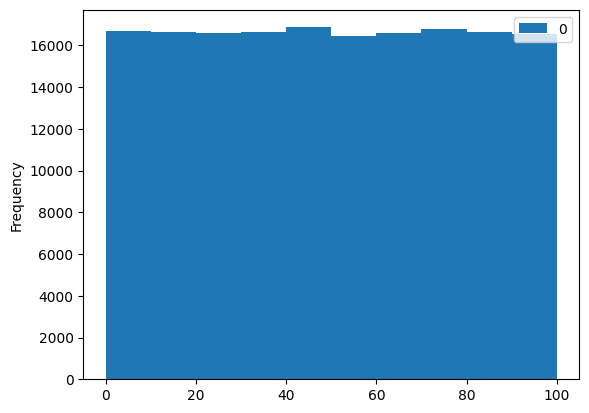

In [7]:
import numpy as np
y_pred = np.random.uniform(0, 100, df_extract.shape[0])
pd.DataFrame(y_pred).plot(kind='hist')

In [8]:
x_pred = df_extract

In [9]:
config_file = '../data/probability_score.json'
insert_cognite_data(start_time=start_time,
                    end_time=end_time,
                    x_pred=x_pred,
                    y_pred=y_pred,
                    config_file=config_file)